In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# setting

start = '2000'
end = '2020'
symbol = 'AAPL'

In [3]:
# load data

data = pd.read_csv(f"Data/DWJ_download/{symbol}.csv", index_col = 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [4]:
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
       '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-20'],
      dtype='object', name='Date', length=10887)

In [5]:
# set index data type from object to datetime

data.set_index(pd.to_datetime(data.index), inplace = True)
data = data[start:end]
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514481,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146667,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360504,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.231903,96452100
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.221085,99116600


In [7]:
# rescale data from daily to monthly

data = data.resample('M').last() # last is the last date of each month
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-31,0.901786,0.927455,0.843750,0.926339,0.784238,701680000
2000-02-29,1.013951,1.046875,1.005022,1.023438,0.866442,368961600
2000-03-31,1.137835,1.225446,1.125000,1.212612,1.026597,404633600
2000-04-30,1.135045,1.138393,1.083147,1.107701,0.937779,249580800
2000-05-31,0.775670,0.814732,0.748326,0.750000,0.634950,433507200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,126.420853,225702700
2020-09-30,113.790001,117.260002,113.620003,115.809998,113.459404,142675200
2020-10-31,111.059998,111.989998,107.720001,108.860001,106.650459,190272600


In [8]:
# rename a column

data.rename(columns = {'Adj Close': 'price'}, inplace = True)
data

,Open,High,Low,Close,price,Volume
Date,,,,,,
2000-01-31,0.901786,0.927455,0.843750,0.926339,0.784238,701680000
2000-02-29,1.013951,1.046875,1.005022,1.023438,0.866442,368961600
2000-03-31,1.137835,1.225446,1.125000,1.212612,1.026597,404633600
2000-04-30,1.135045,1.138393,1.083147,1.107701,0.937779,249580800
2000-05-31,0.775670,0.814732,0.748326,0.750000,0.634950,433507200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,126.420853,225702700
2020-09-30,113.790001,117.260002,113.620003,115.809998,113.459404,142675200
2020-10-31,111.059998,111.989998,107.720001,108.860001,106.650459,190272600


In [9]:
# get a column to study

df = data['price']
df.head()

Date
2000-01-31    0.784238
2000-02-29    0.866442
2000-03-31    1.026597
2000-04-30    0.937779
2000-05-31    0.634950
Freq: M, Name: price, dtype: float64

In [10]:
df.tail()

Date
2020-08-31    126.420853
2020-09-30    113.459404
2020-10-31    106.650459
2020-11-30    116.834885
2020-12-31    130.221085
Freq: M, Name: price, dtype: float64

<AxesSubplot: xlabel='Date'>

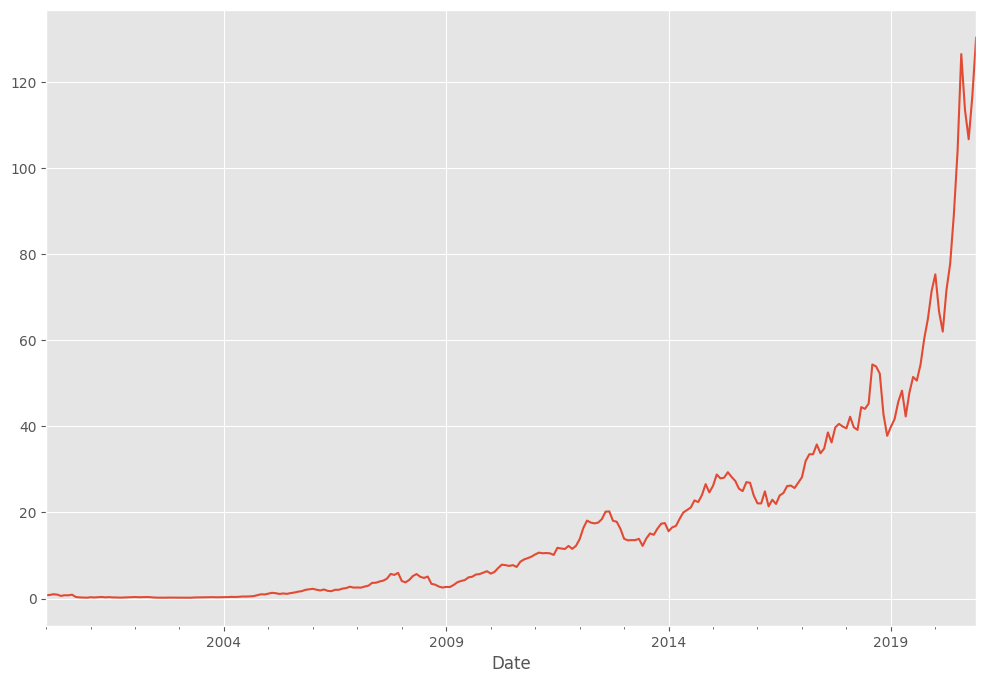

In [11]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

df.plot()

### Augmented Duckey-Fuller (ADF)

- Unit root test
    - Null Hypothesis (H0): <span style= "color:green"> p-value > 0.5 </span>Fail to reject NULL hypothesis, data is <span style= "color:green"> non-stationary </span>
    - Althernate Hypothesis (H1): Reject the NULL hypothesis, data is stationary

In [12]:
# import a model

from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(df, autolag = 'AIC')

(1.9334916466140761,
 0.9985800381250323,
 16,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 1122.0922193458669)

In [14]:
# p-value = 0.9985800381250323 so our data is non-stationary

In [17]:
# crate a function to track above label 

def adftest(data):

    data = data.copy()

    index = ['adf statistic', 'p_value', 'lag', 'observation']
    result = adfuller(data, autolag = 'AIC')

    adf = pd.Series(result[0:4], index = index)

    if adf[1] > 0.05:
        print('Data is not stationary')
    elif adf[1] < 0.05:
        print('Data is stationary!')
        
    for key, val in result[4].items():
        adf[f'Critical value ({key})'] = val
        
    return adf

In [18]:
adftest(df)

Data is not stationary


adf statistic             1.933492
p_value                   0.998580
lag                      16.000000
observation             235.000000
Critical value (1%)      -3.458487
Critical value (5%)      -2.873919
Critical value (10%)     -2.573367
dtype: float64

### How to make the data to stationary

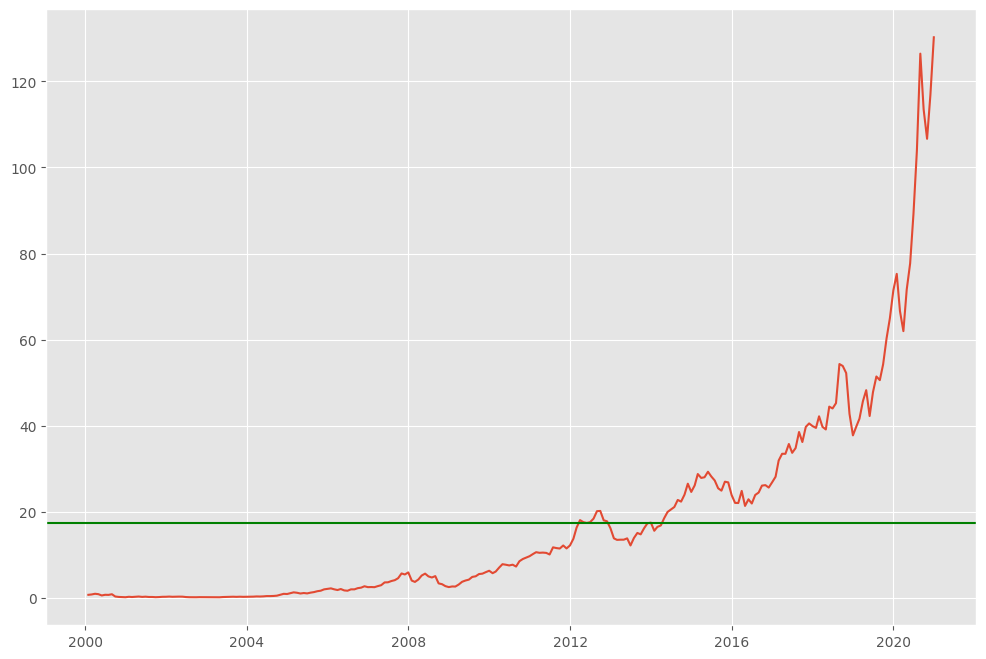

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df)
plt.axhline(y = df.mean(), color = 'g', linestyle = '-')

In [20]:
df.diff()

Date
2000-01-31          NaN
2000-02-29     0.082204
2000-03-31     0.160155
2000-04-30    -0.088818
2000-05-31    -0.302830
                ...    
2020-08-31    22.504959
2020-09-30   -12.961449
2020-10-31    -6.808945
2020-11-30    10.184425
2020-12-31    13.386200
Freq: M, Name: price, Length: 252, dtype: float64

In [21]:
df.head()

Date
2000-01-31    0.784238
2000-02-29    0.866442
2000-03-31    1.026597
2000-04-30    0.937779
2000-05-31    0.634950
Freq: M, Name: price, dtype: float64

In [22]:
0.866442 - 0.784238

0.08220400000000005

In [23]:
1.026597 - 0.866442

0.16015499999999994

Text(0.5, 1.0, 'AAPL Diff Price')

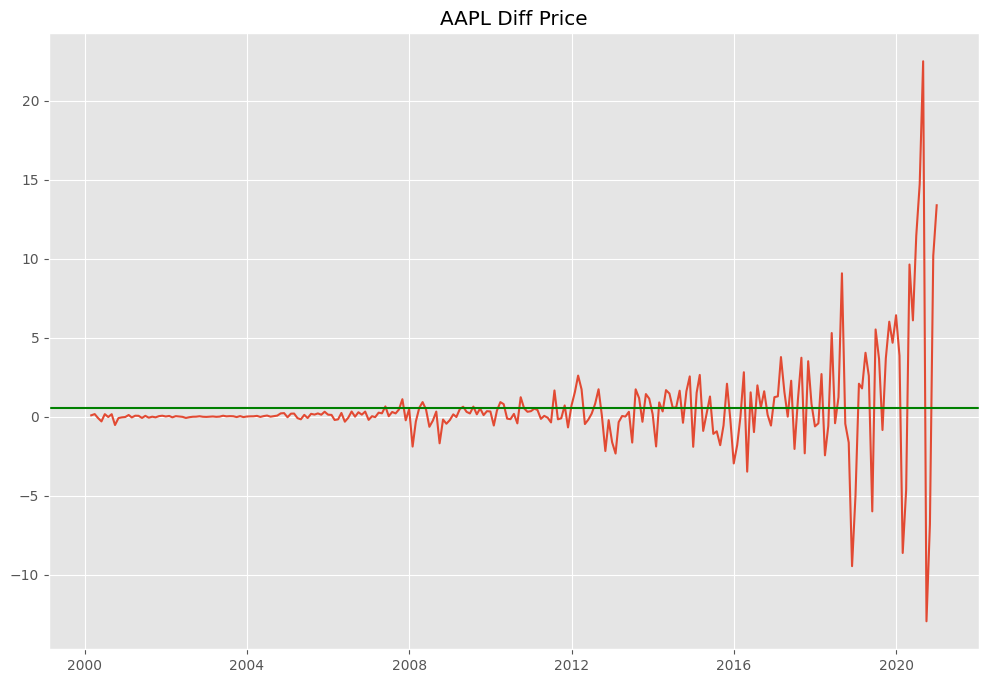

In [25]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df.diff())
plt.axhline(y = df.diff().mean(), color = 'g', linestyle = '-')
plt.title(f'{symbol} Diff Price')

### Here we are going to test data by using our statistic with ADF 

In [26]:
adftest(df.diff().dropna())

Data is not stationary


adf statistic             3.715457
p_value                   1.000000
lag                      16.000000
observation             234.000000
Critical value (1%)      -3.458608
Critical value (5%)      -2.873972
Critical value (10%)     -2.573396
dtype: float64

### We can do double Diff to get a smaller p-value

In [27]:
df.diff().diff()

Date
2000-01-31          NaN
2000-02-29          NaN
2000-03-31     0.077951
2000-04-30    -0.248973
2000-05-31    -0.214012
                ...    
2020-08-31     7.777161
2020-09-30   -35.466408
2020-10-31     6.152504
2020-11-30    16.993370
2020-12-31     3.201775
Freq: M, Name: price, Length: 252, dtype: float64

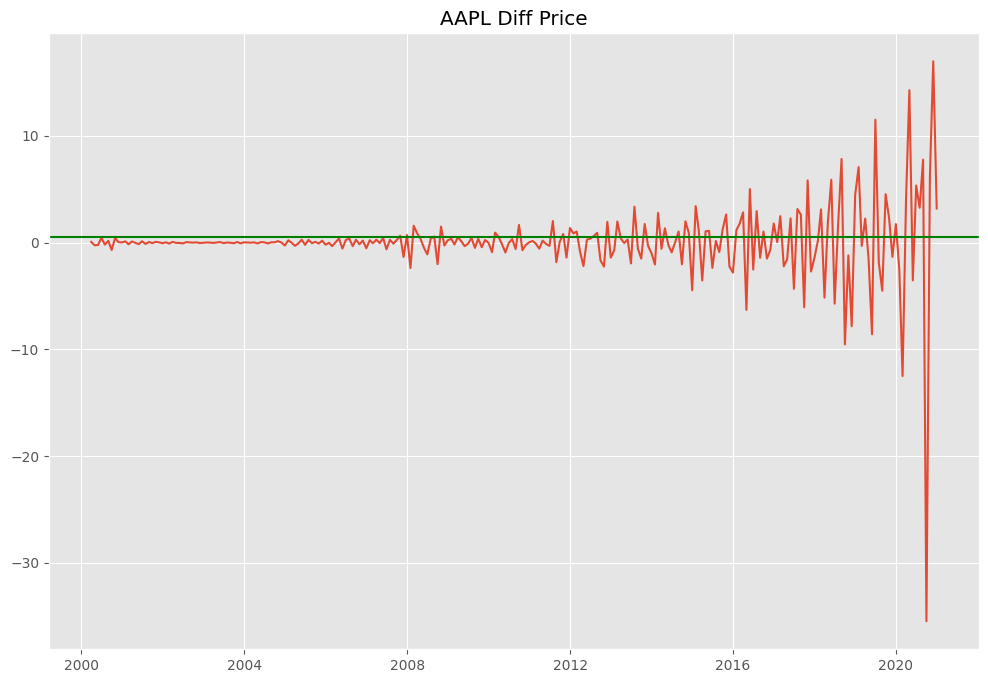

In [29]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df.diff().diff())
plt.axhline(y = df.diff().mean(), color = 'g', linestyle = '-')
plt.title(f'{symbol} Diff Price');

In [30]:
adftest(df.diff().diff().dropna())

Data is stationary!


adf statistic            -3.455290
p_value                   0.009212
lag                      16.000000
observation             233.000000
Critical value (1%)      -3.458731
Critical value (5%)      -2.874026
Critical value (10%)     -2.573424
dtype: float64

### Autocorrelation ACF and Partial Autocorrelation PACF

$ACF $ คือการหาความสัมพันธ์ของ data ของเรากับ data lag ในอดีต 1 time frame หรือ 1 point อาจจะเป็น 1 วันก็ได้ เช่น ราคาวันนี้กับราคาเมื่อวานมีความสัมพันธ์กันอย่างไร
- $corr(Y_{t}, Y_{t-1})$ ราคาวันนี้กับราคาเมื่อวานมีความสัมพันธ์กันอย่างไร
- $corr(Y_{t}, Y_{t-2})$ ราคาวันนี้กับราคาเมื่อสองวันก่อนมีความสัมพันธ์กันอย่างไร
- .
- .
- $corr(Y_{t}, Y_{t-n})$


$ march = corr(march, jan)$
- $jan -> feb$ อันนี้บอกว่ายอดขายเดือน Jan มีความสัมพันธ์กับ Feb
- $feb -> march$ อันนี้บอกว่ายอดขายเดือน Feb มีความสัมพันธ์กับ Mar อย่างไรก็ตาม ยอดขายเดือน Jan มีความสัมพันธ์กับ Mar ด้วย

$PACF$ คือการหาความสัมพันธ์เฉพาะบางส่วน
- $Y_{t} = \theta_{t-1} Y_{t-1} $ หา partial ของ lag 1 มันก็จะมีค่าเท่ากับ correlation ของมันเลย เอาค่า coefficient มาเลย
- $Y_{t} = \theta_{t-1} Y_{t-1} + \theta_{t-2} Y_{t-2}$
- $Y_{t} = \theta_{t-1} Y_{t-1} + \theta_{t-2} Y_{t-2} + \theta_{t-3} Y_{t-3}$
- .
- .
- $Y_{t} = \theta_{t-1} Y_{t-1} + \theta_{t-2} Y_{t-2}+ \theta_{t-3} Y_{t-3} +....+ \theta_{t-n} Y_{t-n}$


https://methods.sagepub.com/base/download/DatasetStudentGuide/time-series-acf-pacf-in-us-feedgrains-1876-2015#:~:text=A%20PACF%20is%20similar%20to,points%20at%20time%20t%20%E2%88%92%201.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

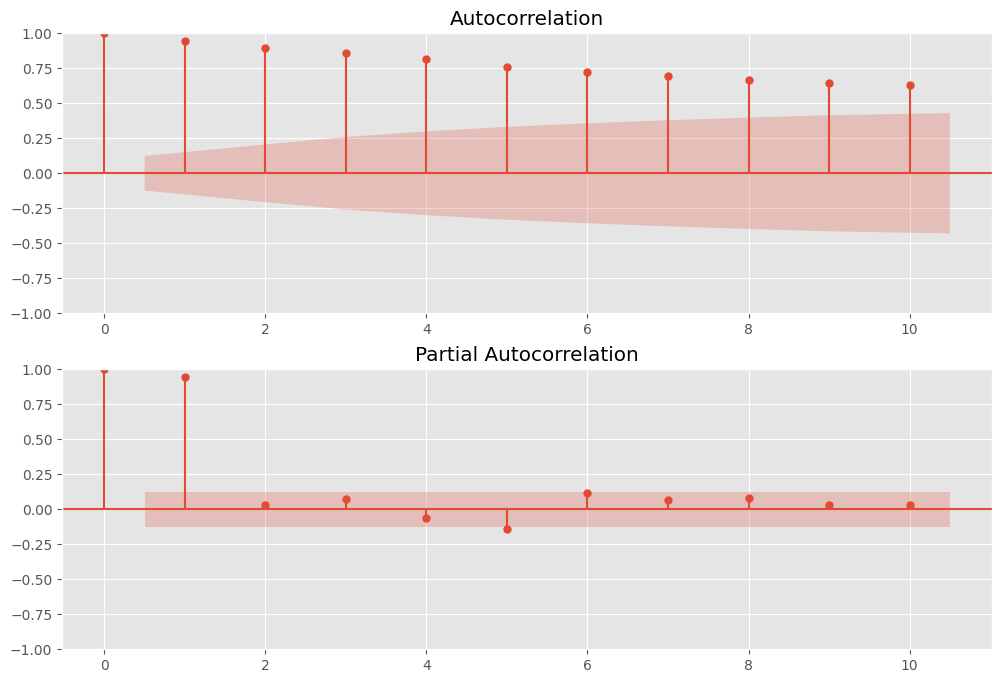

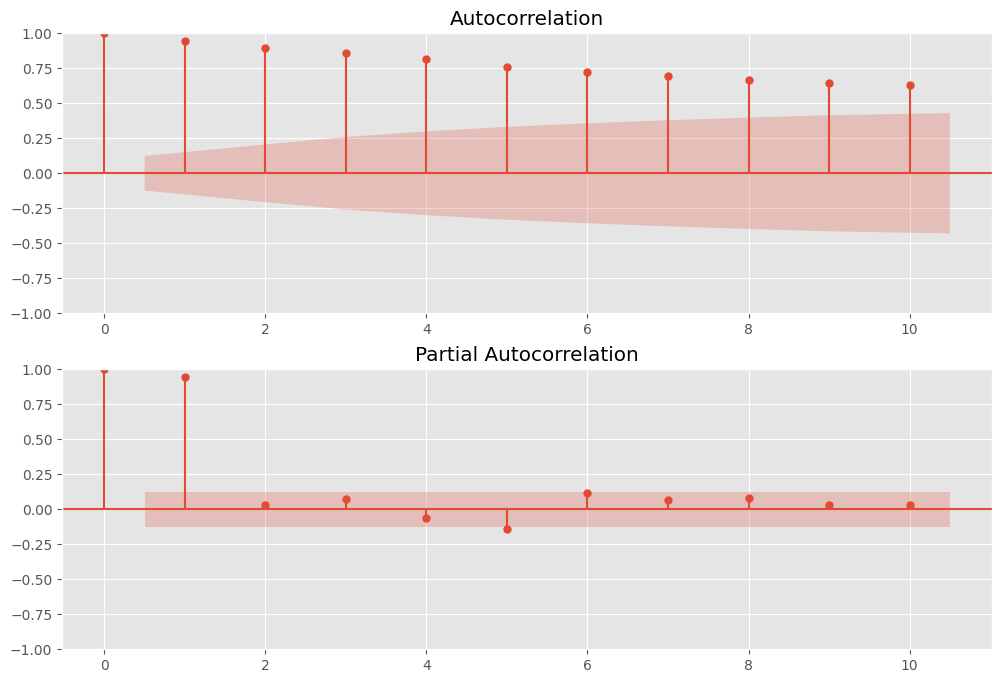

In [32]:
n_lag = 10
sig_lv = 0.05

fig, ax = plt.subplots(2, 1)
plot_acf(df, ax = ax[0], lags = n_lag, alpha = sig_lv,)
plot_pacf(df, ax = ax[1], lags = n_lag, alpha = sig_lv)

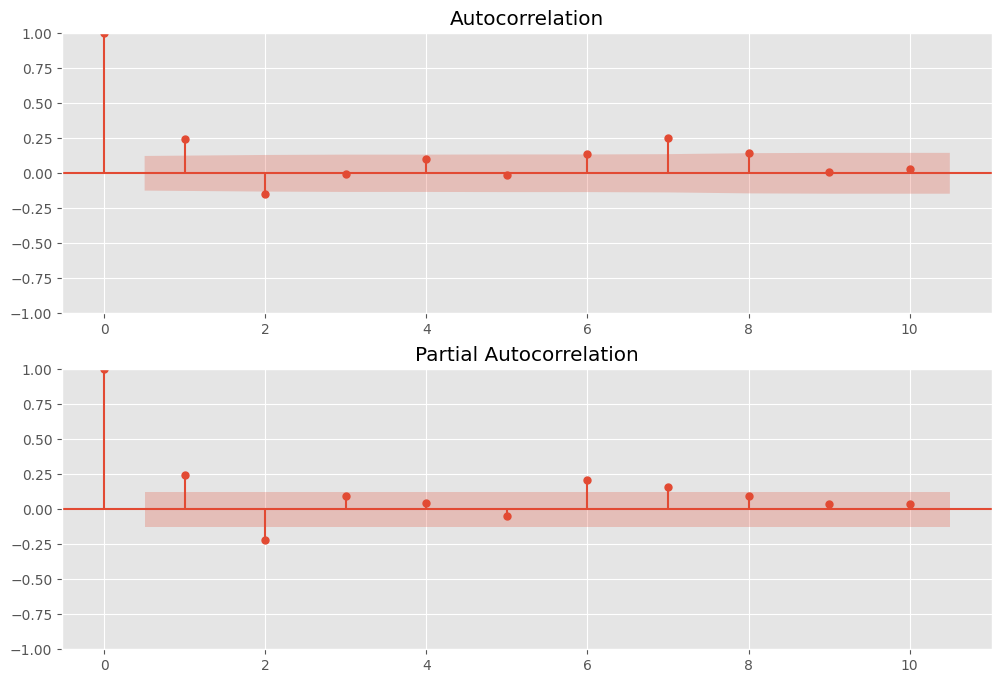

In [33]:
# drop NA

fig, ax = plt.subplots(2, 1)

plot_acf(df.diff().dropna(), ax = ax[0], lags = n_lag, alpha = sig_lv)
plot_pacf(df.diff().dropna(), ax = ax[1],  lags = n_lag, alpha = sig_lv);